# Analyzing NYC's 311 Street Flooding Complaints from 2010 to 2020
## Data Inspection

Mark Bauer

# Goal
In this notebook, we inspect and preview our data before we begin analysis. Specifically, I attempt to inspect the following items:

- the shape of the data
- identify columns and data types
- descriptive or summary statistics
- correlation of columns
- number of null/na values in the dataset

# Main Python Libraries
[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# Datasets

## 311 Service Requests from 2010 to Present  
Website: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

311's data dictionary can be found in the data folder. 



![311](images/nyc-311-screenshot.png)

Table of Contents
=================

   1. Importing Libraries
   2. Loading Data
   3. Data Inspection
       - 3.1 Basic Data Inspection
       - 3.2 Calculating Summary Statistics
       - 3.3 Identifying Null/NA Values
       - 3.4 Inspecting Items In Each Column

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Printing versions of Python modules and packages with **watermark** - the IPython magic extension.

In [2]:
%load_ext watermark

In [3]:
%watermark -v -p numpy,pandas,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy  : 1.23.1
pandas : 1.4.3
seaborn: 0.11.2



Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Loading Data

In [4]:
# list items in data folder
%ls data/

README.md                       street-flooding-complaints.csv
data-dictionaries/              streets-clipped.json


In [5]:
# read data as a dataframe
df = pd.read_csv('data/street-flooding-complaints.csv', low_memory=False)

# shape of data and preview first five rows
print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (27902, 34)


,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,...,location,intersection_street_1,intersection_street_2,closed_date,resolution_description,resolution_action_updated_date,location_type,landmark,facility_type,due_date
0,48542220,2020-12-31T15:41:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11420.0,117-17 135 STREET,135 STREET,FOCH BLVD,...,"{'latitude': '40.67703755925495', 'longitude':...",NaN,NaN,2021-01-01T00:20:00.000,Please call 311 for further information. If yo...,2021-01-01T00:20:00.000,NaN,NaN,NaN,NaN
1,48536430,2020-12-31T14:49:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11357.0,20-24 150 STREET,150 STREET,20 AVE,...,"{'latitude': '40.78072630540092', 'longitude':...",NaN,NaN,2021-01-04T10:15:00.000,The Department of Environment Protection inspe...,2021-01-04T10:15:00.000,NaN,NaN,NaN,NaN
2,48539361,2020-12-31T14:03:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11228.0,7223 8 AVENUE,8 AVENUE,72 ST,...,"{'latitude': '40.62849640806448', 'longitude':...",NaN,NaN,2021-01-02T11:25:00.000,The Department of Environmental Protection has...,2021-01-02T11:25:00.000,NaN,NaN,NaN,NaN
3,48543132,2020-12-31T13:48:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10032.0,NaN,NaN,NaN,...,"{'latitude': '40.841051689545516', 'longitude'...",RIVERSIDE DRIVE,WEST 165 STREET,2020-12-31T14:50:00.000,Please call 311 for further information. If yo...,2020-12-31T14:50:00.000,NaN,NaN,NaN,NaN
4,48536441,2020-12-31T13:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11234.0,3123 FILLMORE AVENUE,FILLMORE AVENUE,E 31 ST,...,"{'latitude': '40.609203447399906', 'longitude'...",NaN,NaN,2021-01-03T10:45:00.000,The Department of Environmental Protection ins...,2021-01-03T10:45:00.000,NaN,NaN,NaN,NaN


In [6]:
# previewing the last five rows of our dataframe
df.tail()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,...,location,intersection_street_1,intersection_street_2,closed_date,resolution_description,resolution_action_updated_date,location_type,landmark,facility_type,due_date
27897,15668560,2010-01-05T10:37:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11234.0,2330 EAST 63 STREET,EAST 63 STREET,OHIO WALK,...,"{'latitude': '40.612503941061355', 'longitude'...",NaN,NaN,2010-01-08T09:00:00.000,The Department of Environment Protection inspe...,2010-01-08T09:00:00.000,NaN,NaN,NaN,NaN
27898,15655327,2010-01-04T16:47:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11428.0,94-18 218 STREET,218 STREET,94 AVE,...,"{'latitude': '40.72005714131501', 'longitude':...",NaN,NaN,2010-01-12T10:35:00.000,The Department of Environment Protection inspe...,2010-01-12T10:35:00.000,NaN,NaN,NaN,NaN
27899,15640664,2010-01-02T17:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11436.0,116-14 146 STREET,146 STREET,116 AVE,...,"{'latitude': '40.68139962026673', 'longitude':...",NaN,NaN,2010-01-12T11:00:00.000,The Department of Environment Protection inspe...,2010-01-12T11:00:00.000,NaN,NaN,NaN,NaN
27900,15640572,2010-01-02T12:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10302.0,NaN,NaN,NEWARK AVE,...,"{'latitude': '40.63865739388004', 'longitude':...",NEWARK AVENUE,RICHMOND TERRACE,2010-01-02T15:12:00.000,Please call 311 for further information. If yo...,2010-01-02T15:12:00.000,NaN,NaN,NaN,1900-01-02T00:00:00.000
27901,15639934,2010-01-02T08:26:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11229.0,39 DARE COURT,DARE COURT,LOIS AVE,...,"{'latitude': '40.58778491597503', 'longitude':...",NaN,NaN,2010-01-03T08:45:00.000,The Department of Environmental Protection ins...,2010-01-03T08:45:00.000,NaN,NaN,NaN,NaN


# 3. Data Inspection

## 3.1 Basic Data Inspection

In [7]:
# the object's type
type(df)

pandas.core.frame.DataFrame

In [8]:
# printing the column names, non-null counts, and data types of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27902 entries, 0 to 27901
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      27902 non-null  int64  
 1   created_date                    27902 non-null  object 
 2   agency                          27902 non-null  object 
 3   agency_name                     27902 non-null  object 
 4   complaint_type                  27902 non-null  object 
 5   descriptor                      27902 non-null  object 
 6   incident_zip                    27045 non-null  float64
 7   incident_address                17865 non-null  object 
 8   street_name                     17865 non-null  object 
 9   cross_street_1                  24148 non-null  object 
 10  cross_street_2                  24137 non-null  object 
 11  address_type                    27896 non-null  object 
 12  city                            

In [9]:
# printing True/False if column is unique on our unique key (DOITT_ID)
df['unique_key'].is_unique

True

In [10]:
# Inspecting data for unique columns (True/False)
for col in df.columns:
    print('{}: {}'.format(col, df[col].is_unique))

unique_key: True
created_date: False
agency: False
agency_name: False
complaint_type: False
descriptor: False
incident_zip: False
incident_address: False
street_name: False
cross_street_1: False
cross_street_2: False
address_type: False
city: False
status: False
community_board: False
bbl: False
borough: False
x_coordinate_state_plane: False
y_coordinate_state_plane: False
open_data_channel_type: False
park_facility_name: False
park_borough: False
latitude: False
longitude: False
location: False
intersection_street_1: False
intersection_street_2: False
closed_date: False
resolution_description: False
resolution_action_updated_date: False
location_type: False
landmark: False
facility_type: False
due_date: False


In [11]:
# printing count of number of unique values per column
columns = df.columns

(df[columns]
 .astype(str)
 .describe(include='all')[:2]
 .T
 .sort_values(by='unique', ascending=False)
)

,count,unique
unique_key,27902,27902
created_date,27902,26389
closed_date,27902,25421
resolution_action_updated_date,27902,25410
location,27902,17041
longitude,27902,17041
latitude,27902,17041
x_coordinate_state_plane,27902,15675
y_coordinate_state_plane,27902,15634
incident_address,27902,12446


In [12]:
# previewing most common value and corresponding count per given column
cols = ['descriptor', 'agency', 'agency_name', 'complaint_type', 'status']

for col in cols:
    print(df[col].value_counts(), '\n')

Street Flooding (SJ)    27902
Name: descriptor, dtype: int64 

DEP    27902
Name: agency, dtype: int64 

Department of Environmental Protection    27902
Name: agency_name, dtype: int64 

Sewer    27902
Name: complaint_type, dtype: int64 

Closed      27891
Pending         9
Assigned        1
Started         1
Name: status, dtype: int64 



Looking at the `resolution_description` field

In [13]:
(df['resolution_description']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'resolution_description', 'resolution_description':'count'})
 .head()
)

,resolution_description,count
0,The Department of Environment Protection inspe...,10327
1,Please call 311 for further information. If yo...,5127
2,The Department of Environmental Protection ins...,3172
3,The Department of Environmental Protection inv...,2653
4,The Department of Environmental Protection has...,1463


In [14]:
print('Top 10 Resolution Descriptions in Descending Order:\n')

for i in range(10):
    print('{}. {}'.format(i + 1, df['resolution_description'].value_counts().index[i]))
    print('Count: {:,}'.format(df['resolution_description'].value_counts()[i]))
    print()

Top 10 Resolution Descriptions in Descending Order:

1. The Department of Environment Protection inspected your complaint but could not find the problem you reported. If the condition persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) with more detailed information to submit a new complaint.
Count: 10,327

2. Please call 311 for further information. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).
Count: 5,127

3. The Department of Environmental Protection inspected your complaint and referred it to the Department of Transportation for further action. If the problem persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint.
Count: 3,172

4. The Department of Environmental Protection investigated this complaint and resolved the street flooding.
Count: 2,653

5. The Department of Environmental Protection has determined that this issue was previously reported by 

In [15]:
# inspecting date range
print('This dataset is from {} to {}'.format(df.created_date.min()[0:10], 
                                             df.created_date.max()[0:10]))

This dataset is from 2010-01-02 to 2020-12-31


## 3.2 Calcualting Summary Statistics

In [16]:
# printing descriptive statistics of our numeric columns in our data
df.describe()

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location_type,landmark,facility_type
count,2.790200e+04,27045.000000,1.615900e+04,2.695900e+04,26959.000000,26959.000000,26959.000000,0.0,0.0,0.0
mean,3.243189e+07,10969.151488,3.699429e+09,1.005498e+06,186184.607441,40.677615,-73.923323,NaN,NaN,NaN
std,9.183919e+06,536.262125,1.075864e+09,3.505257e+04,30576.150750,0.083924,0.126329,NaN,NaN,NaN
min,1.563993e+07,10001.000000,0.000000e+00,9.133570e+05,121032.000000,40.498628,-74.254937,NaN,NaN,NaN
25%,2.429024e+07,10312.000000,3.060255e+09,9.868870e+05,161248.000000,40.609123,-73.990504,NaN,NaN,NaN
50%,3.276295e+07,11220.000000,4.067910e+09,1.007480e+06,183618.000000,40.670610,-73.916267,NaN,NaN,NaN
75%,4.039421e+07,11385.000000,4.156250e+09,1.033980e+06,206488.500000,40.733373,-73.820554,NaN,NaN,NaN
max,4.854313e+07,11697.000000,5.080500e+09,1.067279e+06,271876.000000,40.912869,-73.700384,NaN,NaN,NaN


In [17]:
# transpose for readibility
df.describe(include=['O']).T

,count,unique,top,freq
created_date,27902,26389,2011-08-28T00:00:00.000,13
agency,27902,1,DEP,27902
agency_name,27902,1,Department of Environmental Protection,27902
complaint_type,27902,1,Sewer,27902
descriptor,27902,1,Street Flooding (SJ),27902
incident_address,17865,12445,133-25 FRANCIS LEWIS BOULEVARD,59
street_name,17865,4108,BROADWAY,116
cross_street_1,24148,4621,BEND,342
cross_street_2,24137,4698,DEAD END,492
address_type,27896,4,ADDRESS,16733


In [18]:
# printing descriptive statistics of our numeric columns in our data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_key,27902.0,NaN,NaN,NaN,32431886.079242,9183918.69002,15639934.0,24290244.25,32762946.0,40394205.75,48543132.0
created_date,27902,26389,2011-08-28T00:00:00.000,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agency,27902,1,DEP,27902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agency_name,27902,1,Department of Environmental Protection,27902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
complaint_type,27902,1,Sewer,27902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
descriptor,27902,1,Street Flooding (SJ),27902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incident_zip,27045.0,NaN,NaN,NaN,10969.151488,536.262125,10001.0,10312.0,11220.0,11385.0,11697.0
incident_address,17865,12445,133-25 FRANCIS LEWIS BOULEVARD,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street_name,17865,4108,BROADWAY,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cross_street_1,24148,4621,BEND,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# returning the mode of our numeric columns (excluding our unique key = 'DOITT_ID') as 'mode'
mode = (df
        .drop(columns=['unique_key'])
        .mode(numeric_only=False)
       )

# renaming index to 'mode'
mode = mode.rename(index={0: "mode"})

# transposing and printing the mode ofour numeric columns (excluding our unique key = 'DOITT_ID')
mode.T

,mode
created_date,2011-08-28T00:00:00.000
agency,DEP
agency_name,Department of Environmental Protection
complaint_type,Sewer
descriptor,Street Flooding (SJ)
incident_zip,10306.0
incident_address,133-25 FRANCIS LEWIS BOULEVARD
street_name,BROADWAY
cross_street_1,BEND
cross_street_2,DEAD END


In [20]:
# compute pairwise correlation of columns, excluding NA/null values
df.corr()

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location_type,landmark,facility_type
unique_key,1.000000,0.033079,-0.028177,0.021987,0.032326,0.032337,0.021996,NaN,NaN,NaN
incident_zip,0.033079,1.000000,0.131453,0.705042,-0.100107,-0.100559,0.704665,NaN,NaN,NaN
bbl,-0.028177,0.131453,1.000000,-0.200249,-0.581858,-0.582353,-0.200213,NaN,NaN,NaN
x_coordinate_state_plane,0.021987,0.705042,-0.200249,1.000000,0.461026,0.460378,0.999999,NaN,NaN,NaN
y_coordinate_state_plane,0.032326,-0.100107,-0.581858,0.461026,1.000000,0.999999,0.461637,NaN,NaN,NaN
latitude,0.032337,-0.100559,-0.582353,0.460378,0.999999,1.000000,0.460989,NaN,NaN,NaN
longitude,0.021996,0.704665,-0.200213,0.999999,0.461637,0.460989,1.000000,NaN,NaN,NaN
location_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
facility_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

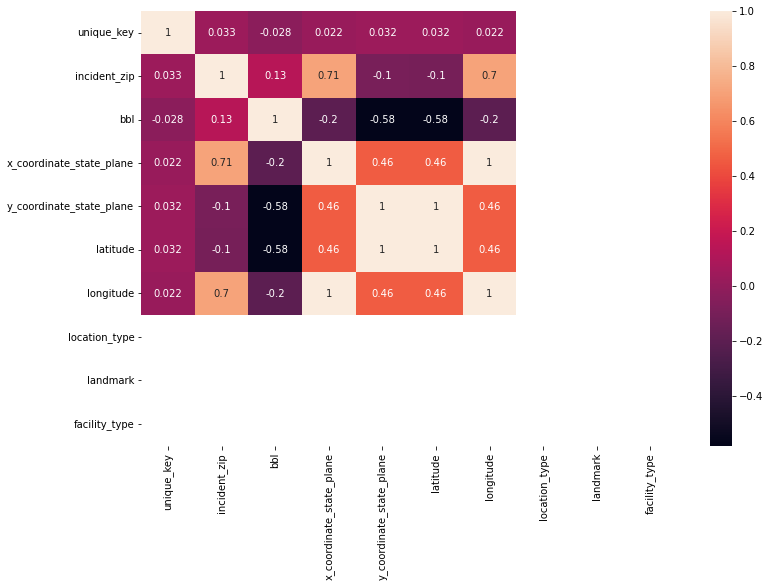

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(df.corr(), 
            annot=True, 
            ax=ax)

deleting blank values for the heat map

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27902 entries, 0 to 27901
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      27902 non-null  int64  
 1   created_date                    27902 non-null  object 
 2   agency                          27902 non-null  object 
 3   agency_name                     27902 non-null  object 
 4   complaint_type                  27902 non-null  object 
 5   descriptor                      27902 non-null  object 
 6   incident_zip                    27045 non-null  float64
 7   incident_address                17865 non-null  object 
 8   street_name                     17865 non-null  object 
 9   cross_street_1                  24148 non-null  object 
 10  cross_street_2                  24137 non-null  object 
 11  address_type                    27896 non-null  object 
 12  city                            

In [23]:
df.columns

Index(['unique_key', 'created_date', 'agency', 'agency_name', 'complaint_type',
       'descriptor', 'incident_zip', 'incident_address', 'street_name',
       'cross_street_1', 'cross_street_2', 'address_type', 'city', 'status',
       'community_board', 'bbl', 'borough', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'open_data_channel_type',
       'park_facility_name', 'park_borough', 'latitude', 'longitude',
       'location', 'intersection_street_1', 'intersection_street_2',
       'closed_date', 'resolution_description',
       'resolution_action_updated_date', 'location_type', 'landmark',
       'facility_type', 'due_date'],
      dtype='object')

In [24]:
heatmap = df.loc[:, ['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
                   'complaint_type', 'descriptor', 'incident_zip', 'incident_address',
                   'street_name', 'cross_street_1', 'cross_street_2', 'address_type',
                   'city', 'status', 'resolution_description',
                   'resolution_action_updated_date', 'community_board', 'borough',
                   'x_coordinate_state_plane', 'y_coordinate_state_plane',
                   'open_data_channel_type', 'park_facility_name', 'park_borough',
                   'latitude', 'longitude', 'location', 'intersection_street_1',
                   'intersection_street_2', 'bbl']]

heatmap.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,intersection_street_1,intersection_street_2,bbl
0,48542220,2020-12-31T15:41:00.000,2021-01-01T00:20:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11420.0,117-17 135 STREET,135 STREET,...,186000.0,PHONE,Unspecified,QUEENS,40.677038,-73.804417,"{'latitude': '40.67703755925495', 'longitude':...",NaN,NaN,4.116990e+09
1,48536430,2020-12-31T14:49:00.000,2021-01-04T10:15:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11357.0,20-24 150 STREET,150 STREET,...,223771.0,ONLINE,Unspecified,QUEENS,40.780726,-73.814288,"{'latitude': '40.78072630540092', 'longitude':...",NaN,NaN,4.046700e+09
2,48539361,2020-12-31T14:03:00.000,2021-01-02T11:25:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11228.0,7223 8 AVENUE,8 AVENUE,...,168255.0,ONLINE,Unspecified,BROOKLYN,40.628496,-74.016810,"{'latitude': '40.62849640806448', 'longitude':...",NaN,NaN,3.059120e+09
3,48543132,2020-12-31T13:48:00.000,2020-12-31T14:50:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10032.0,NaN,NaN,...,245700.0,PHONE,Unspecified,MANHATTAN,40.841052,-73.944679,"{'latitude': '40.841051689545516', 'longitude'...",RIVERSIDE DRIVE,WEST 165 STREET,NaN
4,48536441,2020-12-31T13:10:00.000,2021-01-03T10:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11234.0,3123 FILLMORE AVENUE,FILLMORE AVENUE,...,161232.0,PHONE,Unspecified,BROOKLYN,40.609203,-73.936548,"{'latitude': '40.609203447399906', 'longitude'...",NaN,NaN,3.084750e+09


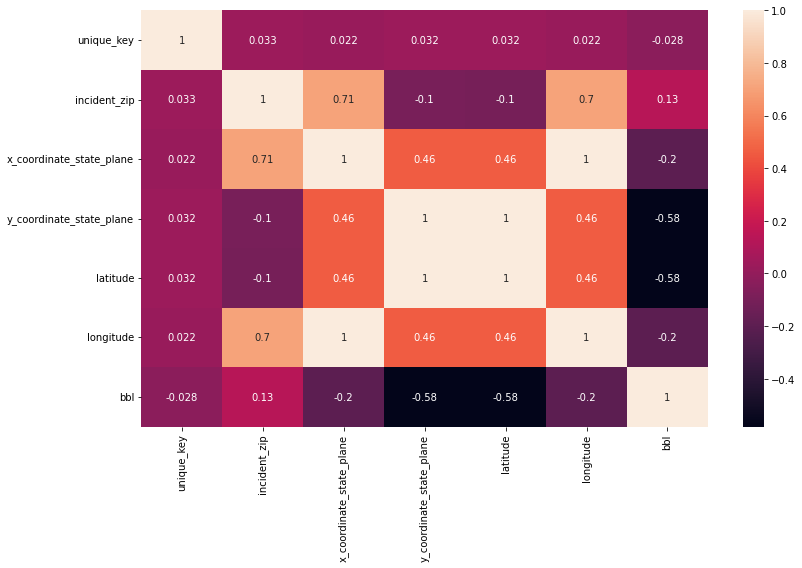

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(heatmap.corr(), 
            annot=True, 
            ax=ax)

plt.tight_layout()

## 3.3 Identifying Null/NA Values

In [26]:
print('Sum of nulls in column:')
df.isna().sum().sort_values(ascending=False)

Sum of nulls in column:


facility_type                     27902
landmark                          27902
location_type                     27902
due_date                          27901
intersection_street_2             17811
intersection_street_1             17811
bbl                               11743
incident_address                  10037
street_name                       10037
cross_street_2                     3765
cross_street_1                     3754
location                            943
longitude                           943
latitude                            943
y_coordinate_state_plane            943
x_coordinate_state_plane            943
incident_zip                        857
city                                854
resolution_description                6
address_type                          6
closed_date                           2
borough                               2
park_borough                          2
community_board                       2
status                                0


In [27]:
print('sum of nulls in all columns: {:,}'.format(df.isnull().sum().sum()))

sum of nulls in all columns: 193,011


In [28]:
print('identifying any null values in column (True/False):')
df.isna().any().sort_values(ascending=False)

identifying any null values in column (True/False):


x_coordinate_state_plane           True
bbl                                True
facility_type                      True
landmark                           True
location_type                      True
resolution_description             True
closed_date                        True
intersection_street_2              True
intersection_street_1              True
location                           True
longitude                          True
latitude                           True
park_borough                       True
y_coordinate_state_plane           True
borough                            True
due_date                           True
community_board                    True
address_type                       True
incident_zip                       True
incident_address                   True
cross_street_1                     True
cross_street_2                     True
street_name                        True
city                               True
park_facility_name                False


In [29]:
# calculating a percentage of the number of nulls to total number of records of each column
missing_data = (df.isnull().sum() / len(df)) * 100

# creating a dataframe
missing_data = pd.DataFrame(missing_data, columns=['Missing Ratio (%)']) 
missing_data = missing_data.sort_values(by='Missing Ratio (%)', ascending=False)
missing_data['Missing Ratio (%)'] = missing_data['Missing Ratio (%)'].round(2)

missing_data.head(len(missing_data))

,Missing Ratio (%)
facility_type,100.00
landmark,100.00
location_type,100.00
due_date,100.00
intersection_street_2,63.83
intersection_street_1,63.83
bbl,42.09
incident_address,35.97
street_name,35.97
cross_street_2,13.49


## 3.4 Inspecting Items In Each Column

In [30]:
len(df.columns)

34

In [31]:
df.iloc[:,:15].head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,address_type,city,status,community_board
0,48542220,2020-12-31T15:41:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11420.0,117-17 135 STREET,135 STREET,FOCH BLVD,120 AVE,ADDRESS,South Ozone Park,Closed,10 QUEENS
1,48536430,2020-12-31T14:49:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11357.0,20-24 150 STREET,150 STREET,20 AVE,20 RD,ADDRESS,Whitestone,Closed,07 QUEENS
2,48539361,2020-12-31T14:03:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11228.0,7223 8 AVENUE,8 AVENUE,72 ST,7 AVE,ADDRESS,BROOKLYN,Closed,10 BROOKLYN
3,48543132,2020-12-31T13:48:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10032.0,NaN,NaN,NaN,NaN,INTERSECTION,NEW YORK,Closed,12 MANHATTAN
4,48536441,2020-12-31T13:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11234.0,3123 FILLMORE AVENUE,FILLMORE AVENUE,E 31 ST,E 32 ST,ADDRESS,BROOKLYN,Closed,18 BROOKLYN


In [32]:
df.iloc[:,15:30].head()

,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,intersection_street_1,intersection_street_2,closed_date,resolution_description,resolution_action_updated_date
0,4.116990e+09,QUEENS,1038500.0,186000.0,PHONE,Unspecified,QUEENS,40.677038,-73.804417,"{'latitude': '40.67703755925495', 'longitude':...",NaN,NaN,2021-01-01T00:20:00.000,Please call 311 for further information. If yo...,2021-01-01T00:20:00.000
1,4.046700e+09,QUEENS,1035682.0,223771.0,ONLINE,Unspecified,QUEENS,40.780726,-73.814288,"{'latitude': '40.78072630540092', 'longitude':...",NaN,NaN,2021-01-04T10:15:00.000,The Department of Environment Protection inspe...,2021-01-04T10:15:00.000
2,3.059120e+09,BROOKLYN,979584.0,168255.0,ONLINE,Unspecified,BROOKLYN,40.628496,-74.016810,"{'latitude': '40.62849640806448', 'longitude':...",NaN,NaN,2021-01-02T11:25:00.000,The Department of Environmental Protection has...,2021-01-02T11:25:00.000
3,NaN,MANHATTAN,999557.0,245700.0,PHONE,Unspecified,MANHATTAN,40.841052,-73.944679,"{'latitude': '40.841051689545516', 'longitude'...",RIVERSIDE DRIVE,WEST 165 STREET,2020-12-31T14:50:00.000,Please call 311 for further information. If yo...,2020-12-31T14:50:00.000
4,3.084750e+09,BROOKLYN,1001868.0,161232.0,PHONE,Unspecified,BROOKLYN,40.609203,-73.936548,"{'latitude': '40.609203447399906', 'longitude'...",NaN,NaN,2021-01-03T10:45:00.000,The Department of Environmental Protection ins...,2021-01-03T10:45:00.000


In [33]:
df.iloc[:,30:].head()

,location_type,landmark,facility_type,due_date
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [35]:
# Returning a dataframe containing counts and normalized counts 
# of unique rows in each column (sorted desc)

for col in df.columns:
    series_1 = df[col].value_counts().head()
    series_2 = df[col].value_counts(normalize=True).head()
    series_2 = series_2.rename(str(col) +  ' (normalized)')
    value_counts = pd.concat([series_1, series_2], axis=1)
    
    print(value_counts, '\n' \
         'Column Name:', col + ',', 'dtype:', df[col].dtype, '\n')    

          unique_key  unique_key (normalized)
48542220           1                 0.000036
27424677           1                 0.000036
27423545           1                 0.000036
27423441           1                 0.000036
27418573           1                 0.000036 
Column Name: unique_key, dtype: int64 

                         created_date  created_date (normalized)
2011-08-28T00:00:00.000            13                   0.000466
2019-10-27T13:22:00.000             7                   0.000251
2011-08-29T00:00:00.000             6                   0.000215
2017-05-05T13:49:00.000             6                   0.000215
2020-07-10T16:04:00.000             5                   0.000179 
Column Name: created_date, dtype: object 

     agency  agency (normalized)
DEP   27902                  1.0 
Column Name: agency, dtype: object 

                                        agency_name  agency_name (normalized)
Department of Environmental Protection        27902                

                         resolution_action_updated_date  \
2017-05-06T08:30:00.000                              36   
2019-12-18T09:30:00.000                              17   
2018-09-28T10:30:00.000                              13   
2019-05-14T09:30:00.000                              12   
2019-12-20T09:30:00.000                              12   

                         resolution_action_updated_date (normalized)  
2017-05-06T08:30:00.000                                     0.001290  
2019-12-18T09:30:00.000                                     0.000609  
2018-09-28T10:30:00.000                                     0.000466  
2019-05-14T09:30:00.000                                     0.000430  
2019-12-20T09:30:00.000                                     0.000430   
Column Name: resolution_action_updated_date, dtype: object 

Empty DataFrame
Columns: [location_type, location_type (normalized)]
Index: [] 
Column Name: location_type, dtype: float64 

Empty DataFrame
Columns: [landma